# HTTP i biblioteka requests

### Joanna Tustanowska, Marcin Markiewicz
### 27.11.2018, 10.12.2018, Python4Beginners

**Plan na dziś**

**1. Jak zarządzać swoją instalacją Pythona i nie zwariować**  [Wirtualne terrarium](Wirtualne terrarium.ipynb)
    * dlaczego powinniśmy to robić
    * jakie mamy narzędzia i jak działają
    * dobre praktyki
    
**2. Biblioteka requests - HTTP i API w Pythonie** `            <-------`
    * protokół HTTP (co to jest protokół i co to jest HTTP)
    * JSON API
    * jak wypełnić formularz w pythonie?
    * co robić, gdy potrzebne jest zalogowanie się?
    * do poczytania (scrapy, httpie/postman/curl, więcej o API design)
    


# Część 2:
# HTTP i requests, czyli dogadaj się z serwerem

### Jak rozmawiają ze sobą maszyny w sieci?

* Żeby się dogadać, potrzebują ustalonego zestawu komunikatów i odpowiedzi, czyli **protokołu komunikacji**
* Protokoły mogą specyfikować komunikację na różnych warstwach, np. sprzętu, systemu operacyjnego, aplikacji
* Najpopularniejszym z protokołów aplikacyjnych jest właśnie **HTTP** (Hyper Text Transfer Protocol), czyli oficjalny protokół WWW 

* Komunikacja na wszystkich warstwach (sprzętowej, sieciowej, aplikacyjnych) odbywa się jednocześnie.
* Więcej o różnych protokołach sieciowych: https://en.wikipedia.org/wiki/List_of_network_protocols_(OSI_model)

### Kto używa HTTP?

* np. nasza przeglądarka WWW komunikuje się z serwerami po HTTP
* większość aplikacji mobilnych, które 'coś robią' 'w chmurze' używa HTTP
* aplikacje i usługi sieciowe rozmawiają ze sobą nawzajem, często po HTTP


### 'Surowe' zapytanie HTTP  do httpbin.org/ip
```http
GET /ip HTTP/1.1
Accept: */*
Host: httpbin.org
User-Agent: HTTPie/1.0.0
```
```http
HTTP/1.1 200 OK
Content-Length: 33
Content-Type: application/json
Date: Mon, 26 Nov 2018 09:40:45 GMT
Server: gunicorn/19.9.0
{
    "origin": "31.214.137.130"
}
```

### Schemat komunikacji - żądanie

`GET /ip HTTP/1.1` - podajemy **metodę**, URI i wersję protokołu ("poproszę o zasób pod adresem `/ip`, rozmawiamy w HTTP/1.1").

**Nagłówki**  
`Accept: */*` - akceptuję wszystkie typy danych, np. `text/plain`, `application/json`  
`Accept-Encoding: gzip, deflate` - umiem sobie rozpakować, co mi serwer przyśle   
`Connection: keep-alive` - niech serwer nie zamyka połączenia ze mną od razu po obsłużeniu zapytania, zamierzam wrócić  
`Host: httpbin.org`  
`User-Agent: HTTPie/1.0.0` - a przeglądarka może przedstawić się np. tak: `Mozilla/5.0 (X11; Linux x86_64; rv:63.0) Gecko/20100101 Firefox/63.0`  
...ciasteczka, inne nagłówki, np. autoryzacja

**Dane**

W metodzie GET nie przesyłamy dodatkowych danych.

#### Odpowiedź HTTP - cd.

**Nagłówki**  
`[...]`  
`Content-Length: 33` - rozmiar odesłanych danych  
`Content-Type: application/json` - typ danych, tym razem jest to `JSON`  
`Date: Mon, 26 Nov 2018 09:40:45 GMT`  
`Server: gunicorn/19.9.0`  - serwer  
`Via: 1.1 vegur` - proxy  

**Dane!**
```json
{
    "origin": "31.214.137.130"
}
```

### Co można zrobić po HTTP?

* można pobrać zasób, np. stronę www lub inne dane (medota **GET**)
* można wysłać zasób, np. dane z formularza (**POST**)
* można usunąć lub zaktualizować jakiś zasób (**DELETE**, **PUT**, **PATCH**)
* można ustalić, które z powyższych czynności (*metod*) są dostępne (**OPTIONS**)
* format danych: dowolny, byle dało się je przesłać jako bajty a potem zidentyfikować (nagłówek `Content-type`), np. HTML, zwykły tekst, JSON, pliki binarne

### Cechy protokołu HTTP

* komunikacja w architekturze klient-serwer, np. nasza przeglądarka->serwer WWW
* protokół bezstanowy, czyli po obsłużeniu naszego żądania serwer 'zapomina' o nas, nie przechowuje kontekstu całej komunikacji
    * obejścia: ciasteczka i ich obsługa po stronie aplikacji webowej
    
**ciasteczko** - dostajemy je w prezencie razem z odpowiedzią HTTP, możemy je potem przesyłać razem z naszymi zapytaniami. Jest to nasz "identyfikator" dla serwera.

### Schemat komunikacji - odpowiedź

`HTTP/1.1 200 OK` - wersja protokołu i kod odpowiedzi + opis tekstowy (*HTTP status code*)  

**Najważniejsze kody odpowiedzi**

* `200` (`OK`), `201` (`Created`)- 👍
* `301` (`Moved permanently`) - jesteśmy przekierowywani
* `400` (`Bad request`) - wysłaliśmy niepoprawnie sformatowane dane
* `401` (`Unauthorized`) - najpierw trzeba się uwierzytelnić (lub wysłaliśmy niepoprawne dane logowania)
* `403` (`Forbidden`) - nie mamy uprawnień do tego zasobu
* `404` (`Not found`) - nie ma takiego zasobu
* `418` (`I'm a teapot`) - jestem czainikiem (rządanie kawy od czajnika)
* `5XX` - grupa kodów odpowiedzi wskazujących na błąd po stronie serwera
 
**Do przejrzenia:**
https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

## HTTP w Pythonie!

* rekomendowana biblioteka to `requests`: http://docs.python-requests.org/en/master/
* stwórzmy sobie projekt do naszych eksperymentów: `$ mkdir http_fun`
* stwórzmy sobie środowisko wirtualne:
   ```console
$ cd http_fun
$ pipenv install requests
[...]
$ pipenv shell
   ```

### GET

Stwórzmy sobie plik w katalogu naszego projektu, np. `first_tests.py`.

Tak jak przed chwilą, pobierzmy sobie nasz adres IP z `https://httpbin.org/ip`:

In [1]:
import requests
from pprint import pprint

response = requests.get('https://httpbin.org/ip')

print(response.status_code)
print('-------------------------------')
pprint(response.headers)
print('-------------------------------')
pprint(response.text)   # tekst
print('-------------------------------')
pprint(response.json()) # udogodnienie - requests przetworzy nam JSONa do Pythonowych struktur danych

200
-------------------------------
{'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Content-Type': 'application/json', 'Date': 'Tue, 10 Dec 2019 14:40:17 GMT', 'Referrer-Policy': 'no-referrer-when-downgrade', 'Server': 'nginx', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Length': '55', 'Connection': 'keep-alive'}
-------------------------------
'{\n  "origin": "31.214.137.130, 31.214.137.130"\n}\n'
-------------------------------
{'origin': '31.214.137.130, 31.214.137.130'}


In [2]:
# Stronę internetową też sobie możemy 'otworzyć' (tutaj fragmencik)
print(requests.get('https://google.com').text[:500], '[...]')

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="pl"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="yKx14ZhImiKKWLRe1Cg+PA==">(function(){window.google={kEI:'Ua7vXd-bMISrrgS7wqWwDg',kEXPI:'0,1353747,5662,731,223,755,3971,378,207,1017,1398,789,10,169,544,338,175,364,672,482,3,278,4,60,315,43,368,15,237,3,455,406795, [...]


In [3]:
# W zapytaniach GET możemy przekazywać parametry, tzw. query string
# parametry te wprowadzamy do URI, po znaku '?', oddzielone '&'

response = requests.get('https://httpbin.org/get?param_1=HELLO&other_param=12345')

# Usługa HTTPBin odsyła nam odczytane parametry w body odpowiedzi:

response.json()

{'args': {'other_param': '12345', 'param_1': 'HELLO'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/get?param_1=HELLO&other_param=12345'}

In [4]:
# powyższy kod był brzydki, absolutnie nie musimy samodzielnie serializować parametrów GET

params = {
    'param_1': 'HELLO',
    'other_param': 12345
}

response = requests.get('https://httpbin.org/get', params=params)
print(response.url)
response.json()

https://httpbin.org/get?param_1=HELLO&other_param=12345


{'args': {'other_param': '12345', 'param_1': 'HELLO'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/get?param_1=HELLO&other_param=12345'}

In [5]:
# a jeśli powtórzymy parametr w zapytaniu get?

response = requests.get('https://httpbin.org/get?a=1&a=2&a=3')
response.json()

{'args': {'a': ['1', '2', '3']},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/get?a=1&a=2&a=3'}

In [6]:
# nie musimuy tak brzydko...

params = {
    'a': [1, 2, 3],
    'b': 2
}
response = requests.get('https://httpbin.org/get', params=params)
print(response.url)
response.json()

https://httpbin.org/get?a=1&a=2&a=3&b=2


{'args': {'a': ['1', '2', '3'], 'b': '2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/get?a=1&a=2&a=3&b=2'}

In [7]:
# inne kodowanie "tablic" w url, tzw like PHP

params = {
    'a[]': [1, 2, 3],
    'b': 2
}
response = requests.get('https://httpbin.org/get', params=params)
print(response.url)
response.json()

https://httpbin.org/get?a%5B%5D=1&a%5B%5D=2&a%5B%5D=3&b=2


{'args': {'a[]': ['1', '2', '3'], 'b': '2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/get?a[]=1&a[]=2&a[]=3&b=2'}

In [8]:
# Coś pożytecznego
from pprint import pprint

response = requests.get('http://api.nbp.pl/api/exchangerates/rates/a/gbp/last/10/?format=json')

rates = response.json()['rates']
pprint(rates)


[{'effectiveDate': '2019-11-27', 'mid': 5.0362, 'no': '229/A/NBP/2019'},
 {'effectiveDate': '2019-11-28', 'mid': 5.0775, 'no': '230/A/NBP/2019'},
 {'effectiveDate': '2019-11-29', 'mid': 5.0645, 'no': '231/A/NBP/2019'},
 {'effectiveDate': '2019-12-02', 'mid': 5.0411, 'no': '232/A/NBP/2019'},
 {'effectiveDate': '2019-12-03', 'mid': 5.027, 'no': '233/A/NBP/2019'},
 {'effectiveDate': '2019-12-04', 'mid': 5.045, 'no': '234/A/NBP/2019'},
 {'effectiveDate': '2019-12-05', 'mid': 5.0651, 'no': '235/A/NBP/2019'},
 {'effectiveDate': '2019-12-06', 'mid': 5.0527, 'no': '236/A/NBP/2019'},
 {'effectiveDate': '2019-12-09', 'mid': 5.0915, 'no': '237/A/NBP/2019'},
 {'effectiveDate': '2019-12-10', 'mid': 5.0945, 'no': '238/A/NBP/2019'}]


[{'breeds': [], 'id': 'kxu-a4Cpx', 'url': 'https://cdn2.thecatapi.com/images/kxu-a4Cpx.jpg', 'width': 1280, 'height': 720}]


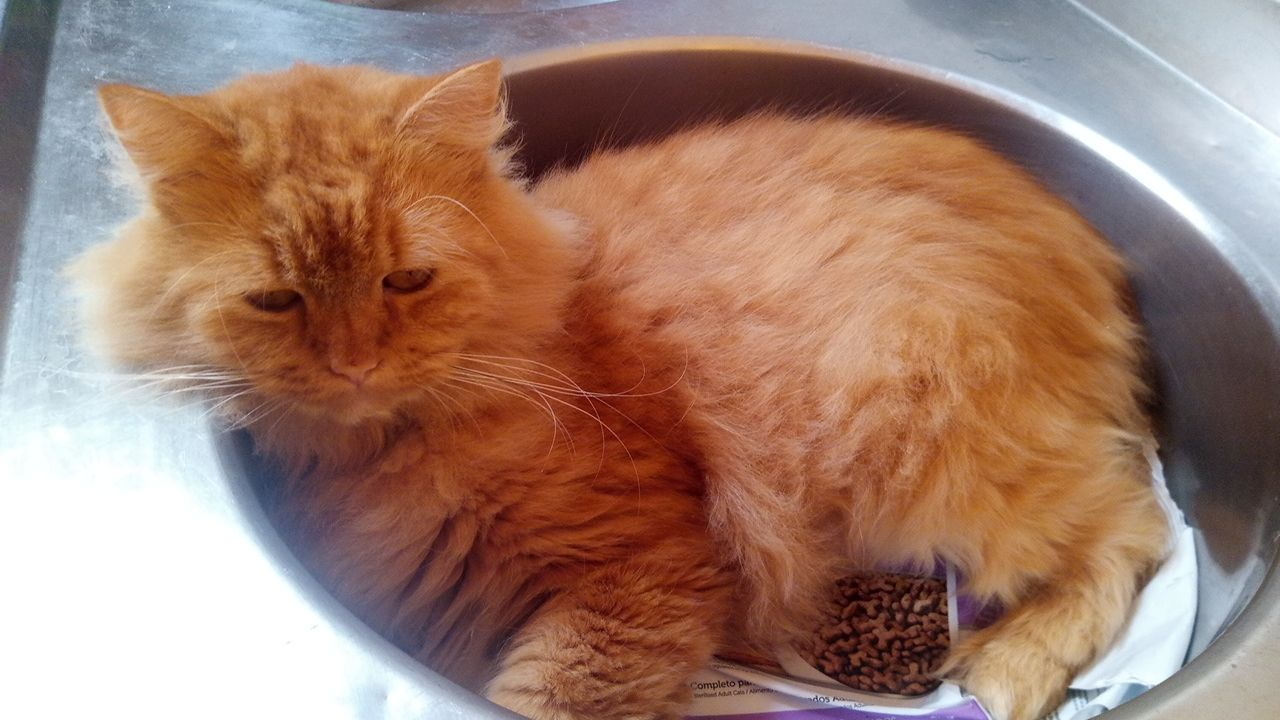

In [9]:
# coś jeszcze bardziej pożytecznego

response = requests.get(
    'https://api.thecatapi.com/v1/images/search',
    params=dict(format='json', order='RANDOM', limit=1),
    headers={'x-api-key': 'DEMO-API-KEY'}
)
print(response.json())

random_cat_url = response.json()[0]['url']
img_response = requests.get(random_cat_url)
 
from IPython.display import Image
Image(img_response.content)


### POST

Tej metody używamy, by przesłać dane do serwera i stworzyć jakiś zasób. Każdy (szanujący się) formularz, jaki wypełniamy, wysyła dane metodą `POST`. 

Przeglądarka WWW zazwyczaj wysyła nasze dane jako `application/x-www-form-urlencoded` lub `multipart/form-data` (gdy przesyłamy załączniki).  
Gdy używamy API JSON-owego, używamy wtedy `application/json`.  
`requests` potrafi serializoać dane do różnych typów MIME. Więcej https://en.wikipedia.org/wiki/Media_type.


In [10]:
post_data = {
    'param_1': 'HI!',
    'other_param': 12345
}

# dane z formularza HTML
response = requests.post(
    'https://httpbin.org/post',
    data=post_data
)

# HTTPBin odesłał informację, że otrzymał dane 'application/x-www-form-urlencoded'
response.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'other_param': '12345', 'param_1': 'HI!'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '31',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'json': None,
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/post'}

In [11]:
# dane w JSONie
response = requests.post(
    'https://httpbin.org/post',
    json=post_data
)

response.json()

{'args': {},
 'data': '{"param_1": "HI!", "other_param": 12345}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '40',
  'Content-Type': 'application/json',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.22.0'},
 'json': {'other_param': 12345, 'param_1': 'HI!'},
 'origin': '31.214.137.130, 31.214.137.130',
 'url': 'https://httpbin.org/post'}

Więcej metod i informacji: http://docs.python-requests.org/en/master/user/quickstart/#make-a-request

### A co jeśli trzeba być zalogowanym?

Prosty przykład: `Basic Auth`

Bardzo często API wymaga takiego formatu uwierzytelniania. Przesyłamy wtedy odpowiednio sformatowany nagłówek o nazwie `Authorization` (jego wartość to konkatenacja nazwy użytkownika, `':'` i hasła, razem zakodowane w base64). Łatwe?

In [12]:
# Przykład Zapytanie na URL httpbin.org/basic-auth/asia/haslo wymaga 
# przesłania nagłówka autoryzacyjnego dla usera 'asia' i hasła 'haslo'

# bez autoryzacji
response = requests.get('https://httpbin.org/basic-auth/asia/haslo')
print(response.status_code) # 401

response = requests.get(
    'https://httpbin.org/basic-auth/asia/haslo',
    auth=('asia', 'haslo')
)
print(response.status_code) # 200

401
200


### Sesje

Czasem potrzebujemy mieć pod ręką ciasteczka, które odsyła nam serwer - na przykład zalogowaliśmy się do aplikacji internetowej przez formularz i chcielibyśmy pozostać zalogowani. Możemy też automatycznie ustawiać nagłówki.

Obiekt sesji udostępnia te same metody HTTP co moduł requests.

In [13]:
# za http://docs.python-requests.org/en/master/user/advanced/#session-objects
s = requests.Session()

# zawsze przesyłaj ten nagłówek
s.headers.update({'x-test': 'true'})

# ustawione ciasteczka zostaną zapisane w sesji
s.get('https://httpbin.org/cookies/set/sessioncookie/123456789')

r = s.get('https://httpbin.org/cookies')

print(r.text)
print(r.request.headers)

{
  "cookies": {
    "sessioncookie": "123456789"
  }
}

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'x-test': 'true', 'Cookie': 'sessioncookie=123456789'}


## Podsumowanie

* HTTP to protokół, w którym rozmawiają aplikacje webowe
* `requests` to bardzo efektywne narzędzie
   * do integracji z internetowymi API rożnego typu
   * do automatyzacji zadań, których nie chce nam się wykonywac ręcznie:)
* dalsza lektura:
   * web scraping, np. https://scrapy.org/
   * narzędzia do testowania API, np. https://www.getpostman.com
   * narzędzia konsolowe do rozmawiania z API (cURL https://curl.haxx.se/, httpie https://httpie.org/)